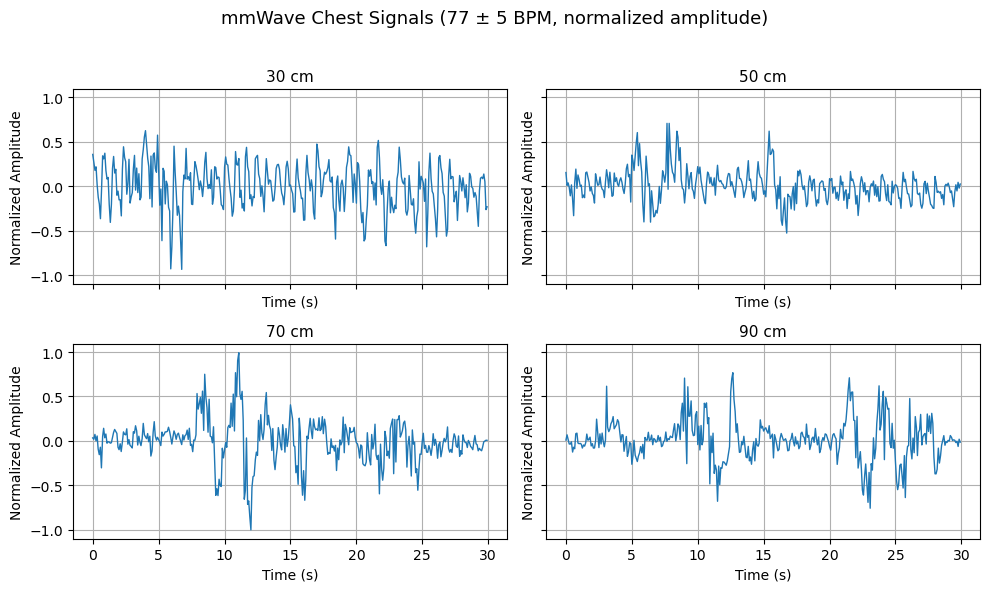

Saved figure → E:\重要文件\毫米波\radar-heartbeat-detection\實驗區\compare_grid_30_50_70_90cm.png


In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BASE_DIR = r"E:\重要文件\毫米波\radar-heartbeat-detection\實驗區"
DISTANCES = [30, 50, 70, 90]

# 先收集資料
all_waves = []
for d in DISTANCES:
    csv_path = os.path.join(BASE_DIR, f"{d}cm", "mmv.csv")
    if not os.path.exists(csv_path):
        print(f"File not found: {csv_path}")
        continue
    df = pd.read_csv(csv_path)
    t = df["t_sec"].to_numpy()
    y = df[df.columns[1]].to_numpy()
    all_waves.append((d, t, y))

# 統一振幅尺度
max_amp = max(np.abs(y).max() for _, _, y in all_waves)

# 畫 2x2 子圖
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (d, t, y) in zip(axes, all_waves):
    y_norm = y / max_amp
    ax.plot(t, y_norm, linewidth=1.0)
    ax.set_title(f"{d} cm", fontsize=11)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Normalized Amplitude")
    ax.grid(True)

fig.suptitle("mmWave Chest Signals (77 ± 5 BPM, normalized amplitude)", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.96])

out_fig = os.path.join(BASE_DIR, "compare_grid_30_50_70_90cm.png")
plt.savefig(out_fig, dpi=600)
plt.show()

print(f"Saved figure → {out_fig}")
